# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from astropy.table import QTable, vstack

# Comparing date range of unique sets|

## Selecting years only columns

In [2]:
def date_grab(sum_table):
    if 'object_name' in sum_table.colnames:
        # ESA Table
        target_col = sum_table['object_name']
    elif 'fullname' in sum_table.colnames:
        # NASA Table
        target_col = sum_table['fullname']
    else:
        print("Error: Could not find 'object_name' or 'fullname' column.")
        return None

    year_list = []
    
    for name in target_col:
        name_str = str(name).strip()
        match = re.search(r'(19|20)\d{2}', name_str)
        
        if match:
            year_list.append(int(match.group()))
        else:
            year_list.append(-1) 
            
    return year_list

In [3]:
nasa_unique = QTable.read('data/unique_nasa.ecsv', format='ascii.ecsv')
esa_unique = QTable.read('data/unique_esa.ecsv', format='ascii.ecsv')
unique_nasa_year = date_grab(nasa_unique)
unique_esa_year = date_grab(esa_unique)

unique_nasa_year_table = QTable()
unique_nasa_year_table['nasa'] = unique_nasa_year
unique_esa_year_table = QTable()
unique_esa_year_table['esa'] = unique_esa_year

## Plotting years hist

In [4]:
# Combined Uniques
unique_all_year = np.concatenate([unique_nasa_year, unique_esa_year])

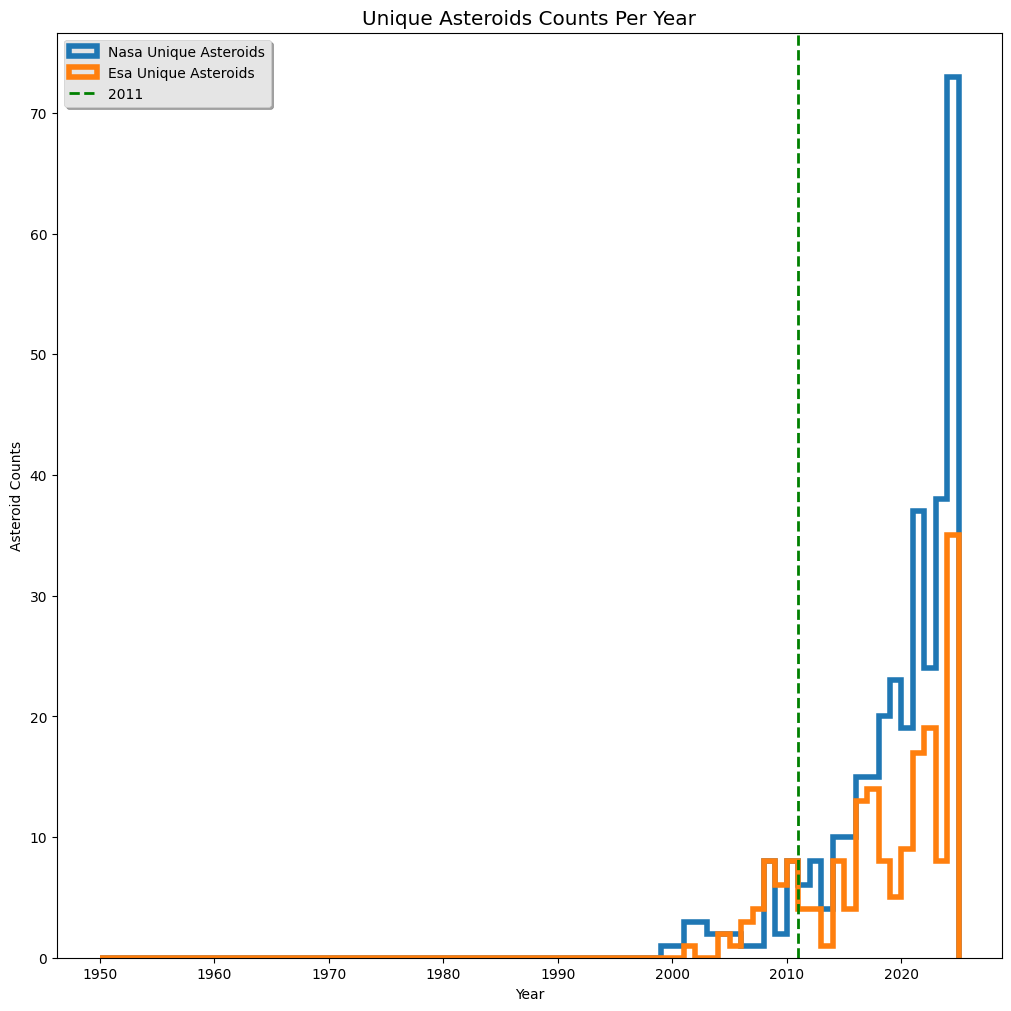

In [5]:
fig, ax = plt.subplots(
    figsize = (10, 10), 
    constrained_layout = True,
)

plt.style.use('ggplot')

# All asteroids
my_bins = np.arange(1950, 2026, 1)

# ax.hist(unique_all_year,
#            bins = my_bins,
#            histtype = 'stepfilled',
#            facecolor = 'DimGray',
#            label = "All asteroids")

# Nasa
ax.hist(unique_nasa_year_table['nasa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'Lime',
           linewidth = 4,
           label = "Nasa Unique Asteroids")
# Esa
ax.hist(unique_esa_year_table['esa'],
           bins = my_bins,
           histtype = 'step',
           facecolor = 'MidnightBlue',
           linewidth = 4,
           label = "Esa Unique Asteroids")

ax.axvline(x = 2011, color='green', linestyle='dashed', linewidth=2, label='2011')

ax.set_title("Unique Asteroids Counts Per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Asteroid Counts")

ax.legend(loc=0, shadow=True);